In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
def create_K_alpha(alpha):
    def K(x, y):
        x+=1
        y+=1
        return (1 / np.sqrt(x*y)) * ((x*y)**alpha / np.maximum(x, y)**(2*alpha))
    return K

def create_A(alpha, N):
    K_alpha = create_K_alpha(alpha)

    A = np.fromfunction(K_alpha, (N, N))
    return A

def max_eigs(N, alphas):
    max_eigvals = []
    max_eigvecs = []
    for alpha in alphas:
        A = create_A(alpha, N)
        eigvals, eigvecs = np.linalg.eigh(A)
        amax = np.argmax(eigvals)
        max_eigvals.append(eigvals[amax])
        maxvec = eigvecs[:, amax]
        maxvec /= maxvec[0]
        max_eigvecs.append(maxvec)
        # print(eigvecs)
    return np.array(max_eigvals), max_eigvecs


alphas = np.array([4, 5])
N = 4


In [4]:
N = 1000
alphas = np.linspace(1, 2, 101)
max_vals, _ = max_eigs(N, alphas)

In [11]:
for i in range(len(alphas)):
    max_val = max_vals[i]
    alpha = alphas[i]

    if max_val > 2/alpha:
        print(f"lambda> alpha/2 for alpha={alpha}")
        alpha_break = alpha
        eigval_break = max_val
        break

lambda> alpha/2 for alpha=1.6099999999999999


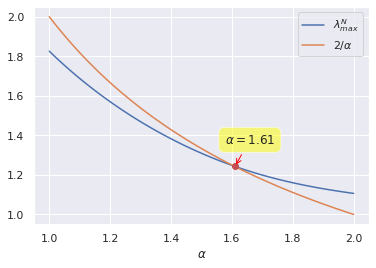

In [34]:
plt.plot(alphas, max_vals, label="$\lambda_{max}^N $")
plt.plot(alphas, 2/alphas, label="2/$\\alpha$")
plt.xlabel("$\\alpha$")
# add in point where lambda = alpha/2
plt.plot(alpha_break, eigval_break, 'ro')

# annotate source: https://www.tutorialspoint.com/writing-numerical-values-on-the-plot-with-matplotlib
plt.annotate(
      f"$\\alpha={alpha_break:.2f}$",
      xy=(alpha_break, eigval_break), xytext=(40, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color="red"))
# plt.title("$\lambda_{max}^N $ vs. $2/\\alpha$")
plt.legend()
plt.savefig("plots/eigenvalue_two_over_alpha.pdf")
plt.show()

lambda> alpha/2 for alpha=1.6099999999999999


In [8]:
N_list = [10, 100, 200, 400, 800, 1600, 3200]
# alphas = np.linspace(1, 2, 101)
# max_vals, _ = max_eigs(N, alphas)
found_eigenvalues = []
alphas = np.array([1.52])
for N in N_list:
    max_vals, _ = max_eigs(N, alphas)
    found_eigenvalues.append(max_vals[0])

print(found_eigenvalues)
alpha = alphas[0]

[1.2240878406144449, 1.2785773359036763, 1.2857242937870679, 1.2910207600796755, 1.2950470079247567, 1.2981754009474908, 1.300652493298374, 1.3026462625671036]


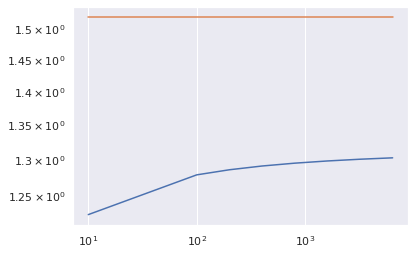

In [12]:
plt.loglog(N_list, found_eigenvalues)
plt.plot(N_list, len(N_list) * [alpha])